In [27]:
import csv
import numpy as np
import math as ma
import pandas as pd
import plotly.express as px

import plotly.graph_objs as go
import plotly.figure_factory as ff
import chart_studio

from statsmodels.graphics.gofplots import qqplot

from scipy import stats
import matplotlib.pyplot as plt

In [95]:
main_df = pd.read_csv(r'Data/vg_complete_df.csv')

In [96]:
vg_df = main_df.copy()

In [97]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4440 non-null   object 
 1   console           4440 non-null   object 
 2   genre_x           4440 non-null   object 
 3   publisher         4440 non-null   object 
 4   developer_x       4440 non-null   object 
 5   critic_score      4440 non-null   float64
 6   total_sales       4440 non-null   float64
 7   release_date_x    4440 non-null   object 
 8   NA_Sales          4440 non-null   float64
 9   EU_Sales          4440 non-null   float64
 10  JP_Sales          4440 non-null   float64
 11  Other_Sales       4440 non-null   float64
 12  Global_Sales      4440 non-null   float64
 13  Critic_Count      4404 non-null   float64
 14  User_Count        4440 non-null   float64
 15  Rating            4422 non-null   object 
 16  positive_critics  512 non-null    float64


Removing some outliers here, specifically, date range and Wii sports (which was sold with the console).

In [98]:
vg_df = vg_df[(vg_df['release_date_x'] > '1999-01-01')]
vg_df = vg_df[(vg_df['release_date_x'] < '2017-01-01')]
vg_df = vg_df[(vg_df['title'] != "Wii Sports")]
vg_df = vg_df[(vg_df['company'] != "KOEI")]
vg_df = vg_df[(vg_df['company'] != "Tecmo")]

Looking at the unique companies

In [99]:
vg_df['company'].unique()

array(['Take Two Interactive', 'Sony', 'Konami', 'Ubisoft', 'Square Enix',
       'Capcom', 'EA', 'Activision Blizzard', 'Nintendo', 'Microsoft',
       'Bandai Namco', 'Sega'], dtype=object)

Starting to do some simple aggregation here.

In [170]:
group = vg_df.groupby(['console'])
group.agg(['mean', 'std', 'count'])['critic_score']

mean        std  count
console                             
3DS      68.792079  12.768960    101
DC       87.357143   5.182918     14
DS       69.252560  13.637091    293
GBA      75.346405  10.783955    153
GC       73.991304  13.196199    230
PC       77.674863  10.965988    366
PS       74.688889  15.502551     90
PS2      72.330447  12.981385    693
PS3      73.199226  13.395192    517
PS4      75.299270  10.845414    137
PSP      70.040000  11.576240    275
PSV      71.491228  11.774856     57
Wii      66.253247  13.675657    308
WiiU     74.175439  14.225383     57
X360     71.601754  14.330802    570
XB       75.186944  12.306747    337
XOne     75.333333  12.168016    111

In [100]:
group = vg_df.groupby(['genre_x'])
group.agg(['mean', 'std', 'count'])['critic_score']

mean        std  count
genre_x                                      
Action            68.366158  14.806686    721
Action-Adventure  74.772727  12.650078     66
Adventure         71.635514  14.126785    214
Fighting          71.465608  13.928584    189
Misc              69.248980  11.763693    245
Music             75.060606   8.268689     33
Platform          72.061856  12.812290    291
Puzzle            74.465753  11.461387     73
Racing            71.778502  13.580905    307
Role-Playing      74.766900  11.063399    429
Shooter           73.845884  13.534001    571
Simulation        72.251282  11.042721    195
Sports            75.486423  12.375889    847
Strategy          75.867188  12.403563    128

In [106]:
vg_df.to_csv('Dash/vg_df_dash.csv', index=False) 

This one isnt working. Will have to figure out what went wrong.

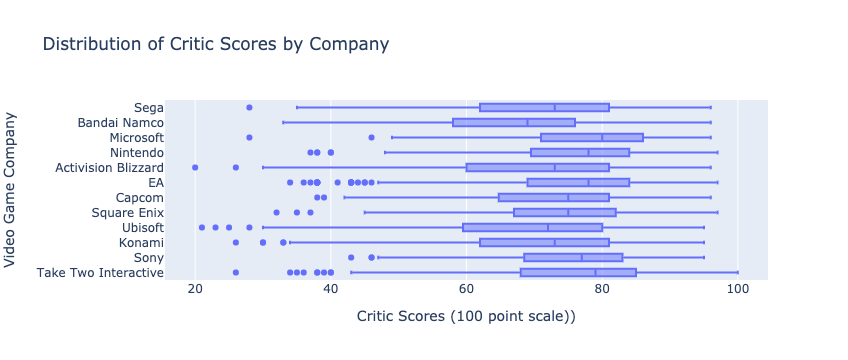

In [104]:
crit_mean = vg_df['critic_score'].mean
comp_crit = px.box(vg_df, y="company", x="critic_score",
                                   labels={
                     "company": "Video Game Company",
                     "critic_score": "Critic Scores (100 point scale))"
                 },
                title="Distribution of Critic Scores by Company")
                  
                  
# comp_crit.add_vline(x= crit_mean, line_width=3, line_dash="dash", line_color="green")

# comp_crit.update_layout(
#     autosize=False,
#     width=500,
#     height=500,
#     margin=dict(
#         l=35,
#         r=10,
#         b=30,
#         t=20,
#         pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
# )

comp_crit.show()

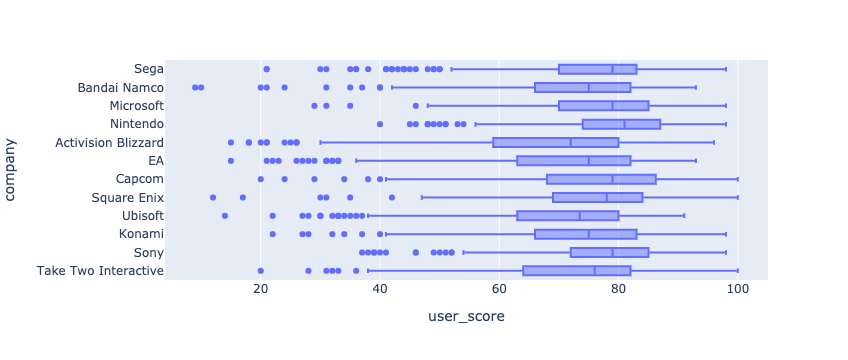

In [102]:
crit_mean = vg_df['critic_score'].mean
comp_crit = px.box(vg_df, y="company", x="user_score")
# comp_crit.add_vline(x= crit_mean, line_width=3, line_dash="dash", line_color="green")

# comp_crit.update_layout(
#     autosize=False,
#     width=500,
#     height=500,
#     margin=dict(
#         l=35,
#         r=10,
#         b=30,
#         t=20,
#         pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
# )

comp_crit.show()

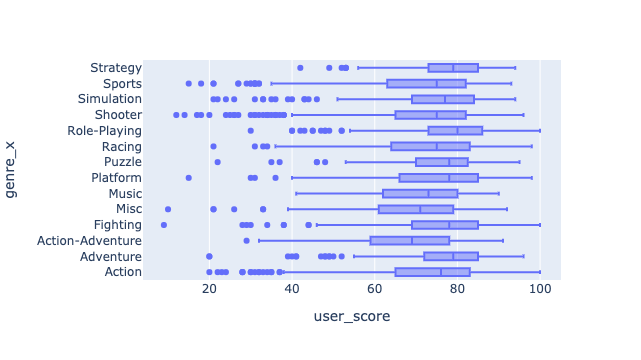

In [39]:
gen_crit = px.box(vg_df, y="genre_x", x="critic_score")
gen_crit.show()

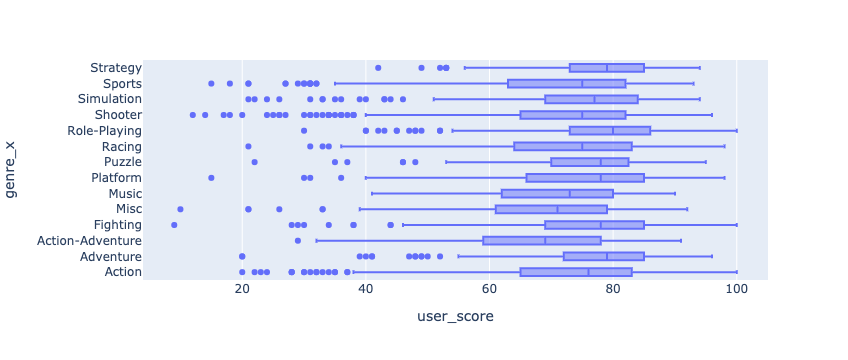

In [39]:
gen_crit = px.box(vg_df, y="genre_x", x="user_score")
gen_crit.show()

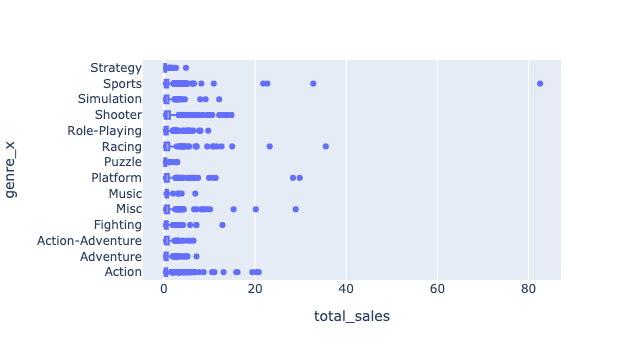

In [18]:
gen_crit = px.box(vg_df, y="genre_x", x="total_sales")
gen_crit.show()

Made this code markdown, but might return later to make it work

import pandas as pd 
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = pd.read_csv(r'Data/vg_complete_df.csv')

app = dash.Dash(__name__)

app.layout = html.Div([
    
    html.P("x-axis:"),
    html.Label('Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'User Score', 'value': 'user_score'},
            {'label': 'User Count', 'value': 'user_count'},
            {'label': 'Critic Score', 'value': 'critic_score'},
            {'label': 'Critic Count', 'value': 'critic_count'},
            {'label': 'Total Sales', 'value': 'total_sales'}
            ],
        value='total_sales'
    ),
    
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['genre', 'company']],
        value='genre', 
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="box-plot"),
])

@app.callback(
    Output("box-plot", "figure"), 
    [Input("x-axis", "value"), 
     Input("y-axis", "value")])
def generate_chart(x, y):
    fig = px.box(df, x=x, y=y)
    return fig

app.run_server(debug=True)

Starting some statistical analysis here - 

qqplot_data = qqplot(gauss_data, line='s').gca().lines

fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})


py.iplot(fig, filename='normality-QQ')

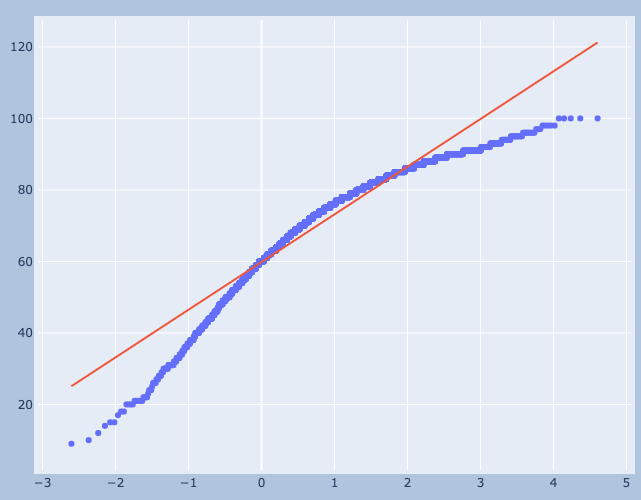

In [55]:
qq = stats.probplot(vg_df['user_score'], dist='norm', sparams=(1))
x = np.array([qq[0][0][0], qq[0][0][-1]])

fig = go.Figure()
fig.add_scatter(x=qq[0][0], y=qq[0][1], mode='markers')
fig.add_scatter(x=x, y=qq[1][1] + qq[1][0]*x, mode='lines')
fig.layout.update(showlegend=False)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

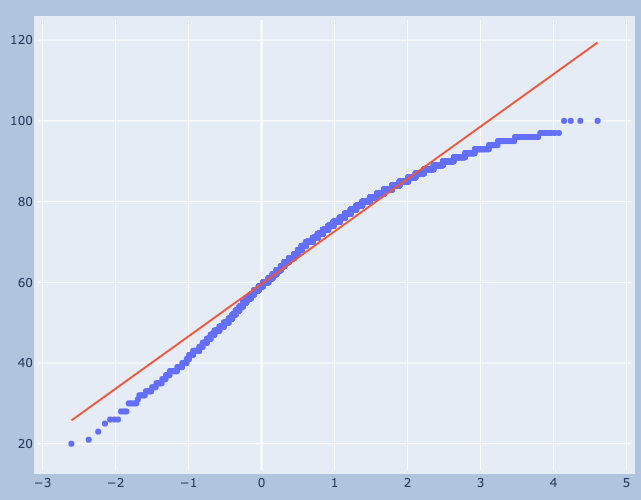

In [54]:
qq = stats.probplot(vg_df['critic_score'], dist='norm', sparams=(1))
x = np.array([qq[0][0][0], qq[0][0][-1]])

fig = go.Figure()
fig.add_scatter(x=qq[0][0], y=qq[0][1], mode='markers')
fig.add_scatter(x=x, y=qq[1][1] + qq[1][0]*x, mode='lines')
fig.layout.update(showlegend=False)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

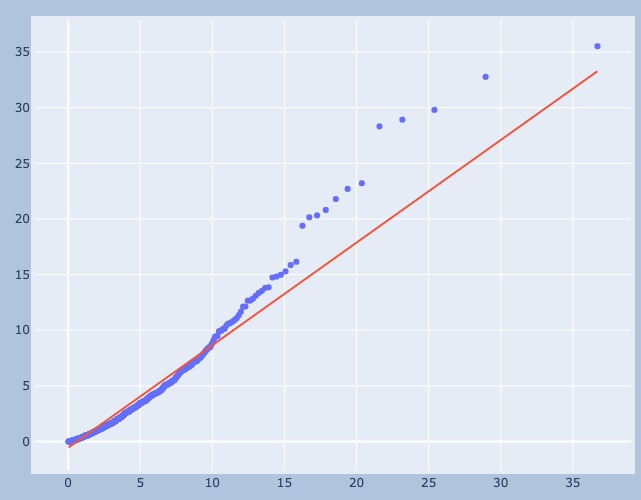

In [124]:
qq = stats.probplot(vg_df['total_sales'], dist='lognorm', sparams=(1))
x = np.array([qq[0][0][0], qq[0][0][-1]])

fig = go.Figure()
fig.add_scatter(x=qq[0][0], y=qq[0][1], mode='markers')
fig.add_scatter(x=x, y=qq[1][1] + qq[1][0]*x, mode='lines')
fig.layout.update(showlegend=False)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

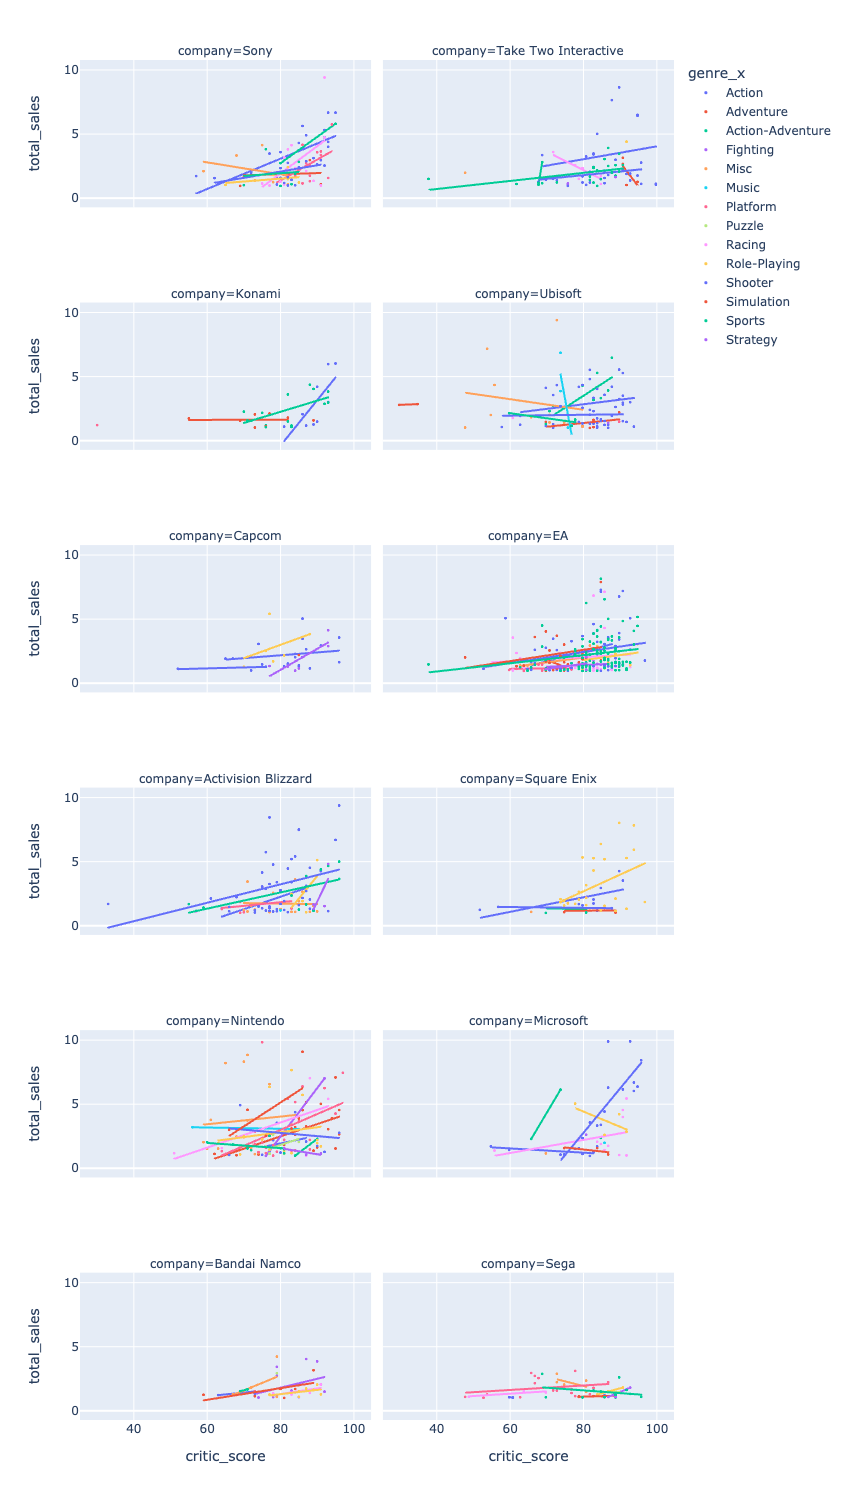

     genre_x               company  \
0     Action                  Sony   
1     Action  Take Two Interactive   
2     Action                Konami   
3     Action               Ubisoft   
4     Action                Capcom   
..       ...                   ...   
86    Sports          Bandai Namco   
87    Sports                  Sega   
88  Strategy                    EA   
89  Strategy   Activision Blizzard   
90  Strategy              Nintendo   

                                       px_fit_results  
0   <statsmodels.regression.linear_model.Regressio...  
1   <statsmodels.regression.linear_model.Regressio...  
2   <statsmodels.regression.linear_model.Regressio...  
3   <statsmodels.regression.linear_model.Regressio...  
4   <statsmodels.regression.linear_model.Regressio...  
..                                                ...  
86  <statsmodels.regression.linear_model.Regressio...  
87  <statsmodels.regression.linear_model.Regressio...  
88  <statsmodels.regression.linear_mode

In [82]:
vg_df_usual = vg_df[(vg_df['total_sales'] < 10)]
vg_df_usual = vg_df_usual[(vg_df_usual['total_sales'] > 1)]
fig = px.scatter(vg_df_usual, x="critic_score", y="total_sales", 
                 facet_col="company",facet_col_wrap=2, 
                 color="genre_x", trendline="ols", height = 1500)

fig.update_traces(marker=dict(size=3,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.show()

results = px.get_trendline_results(fig)
print(results)

#results.query("sex == 'Male' and smoker == 'Yes'").px_fit_results.iloc[0].summary()

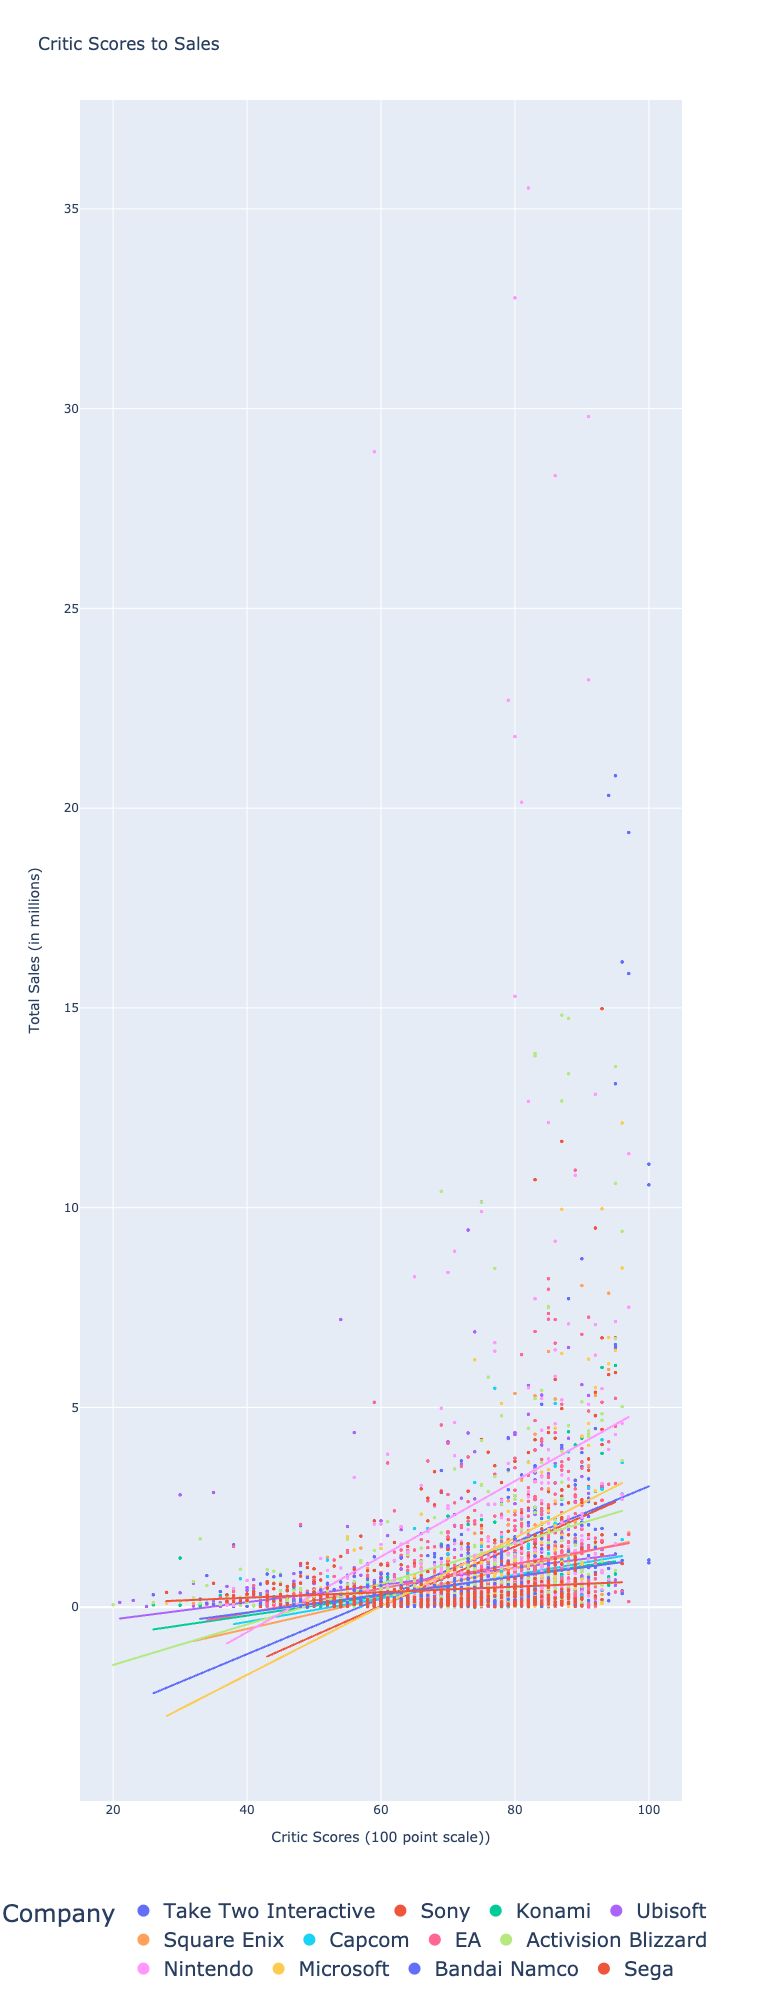

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     41.35
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           5.38e-10
Time:                        20:54:28   Log-Likelihood:                -682.63
No. Observations:                 286   AIC:                             1369.
Df Residuals:                     284   BIC:                             1377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9761      0.836     -4.755      0.0

In [177]:
#vg_df_usual = vg_df[(vg_df['total_sales'] < 10)]
#vg_df_usual = vg_df[(vg_df['total_sales'] > 1)]
fig = px.scatter(vg_df, x="critic_score", y="total_sales", 
                 color = 'company',
                 trendline="ols", height = 2000,
                labels={
                    'company': "Company",
                     "critic_score": "Critic Scores (100 point scale))",
                    "total_sales": "Total Sales (in millions)"
                 },
                title="Critic Scores to Sales")

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.11,
    xanchor="right",
    x=1), legend_font=dict(
    size= 20
), legend_itemsizing="constant", )
fig.update_yaxes(rangemode="tozero")
fig.show()

results = px.get_trendline_results(fig)
result = results.iloc[0]["px_fit_results"].summary()
print(result)



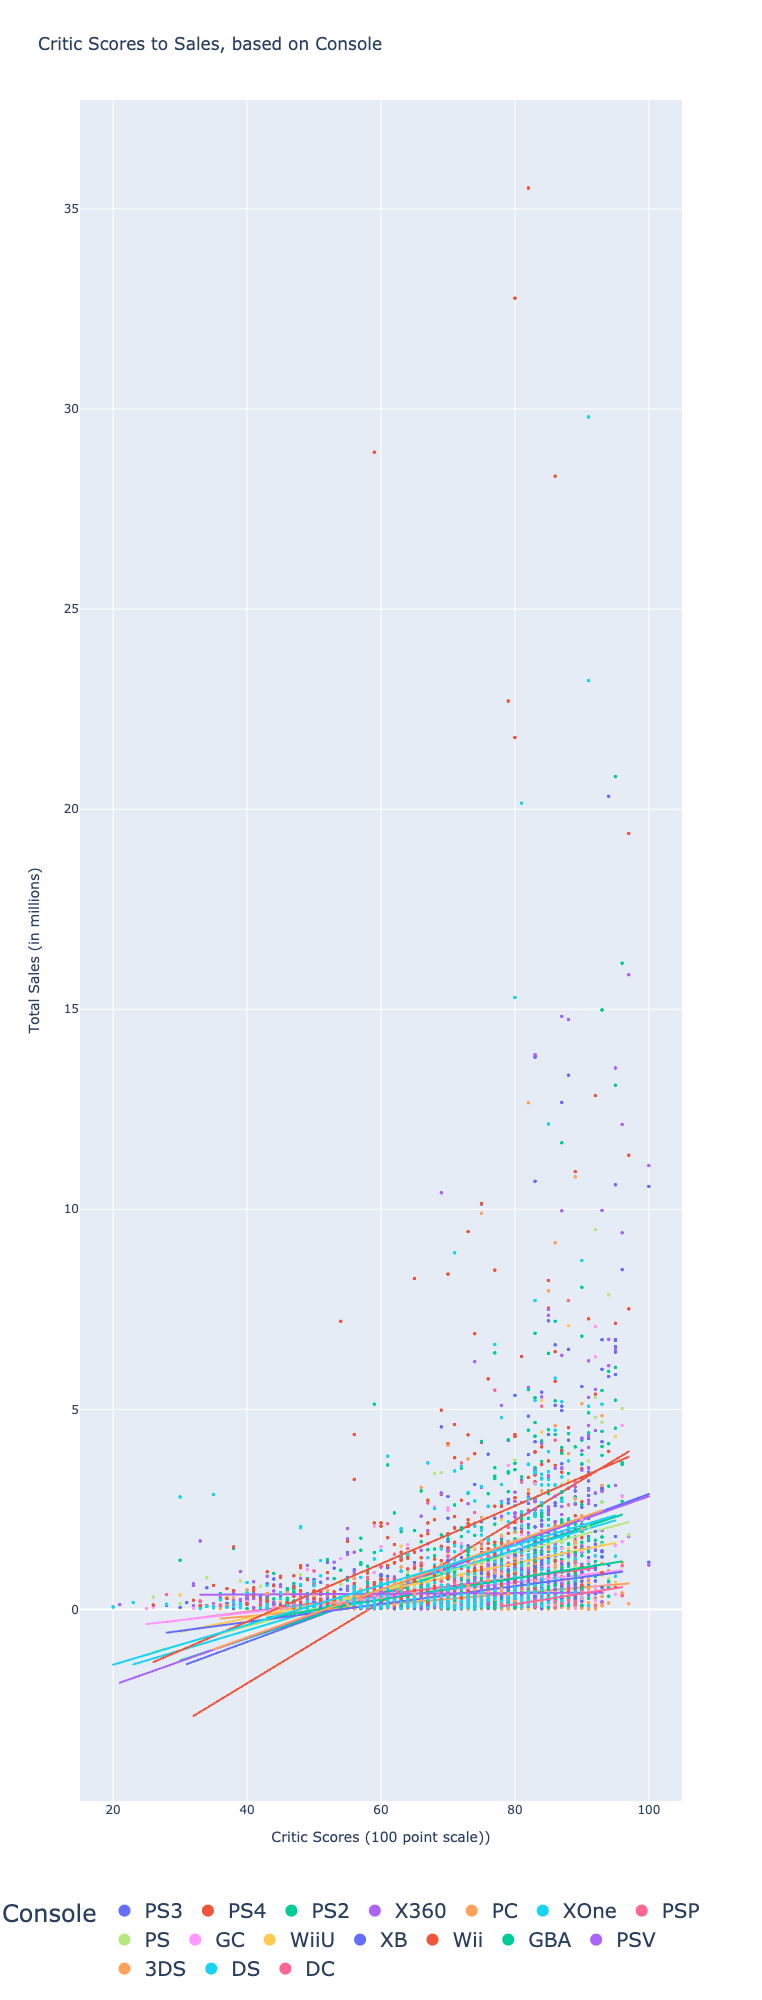

TypeError: object of type 'Summary' has no len()

In [178]:

fig = px.scatter(vg_df, x="critic_score", y="total_sales", 
                 color = 'console',
                 trendline="ols", height = 2000,
                labels={
                    'console': "Console",
                     "critic_score": "Critic Scores (100 point scale))",
                    "total_sales": "Total Sales (in millions)"
                 },
                title="Critic Scores to Sales, based on Console")

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.11,
    xanchor="right",
    x=1), legend_font=dict(
    size= 20
), legend_itemsizing="constant", )
fig.update_yaxes(rangemode="tozero")
fig.show()

results = px.get_trendline_results(fig)


for i in range(len(result)):
    print('_'*80)
    print('='*80 + '\n')
    print('\033[1m' + '#'* 5 + ' ' * 5 + results.iloc[i, 0] +  ' ' * 5 + '#'*5 + '\033[0m')
    result = results.iloc[i]["px_fit_results"].summary()
    print(result)


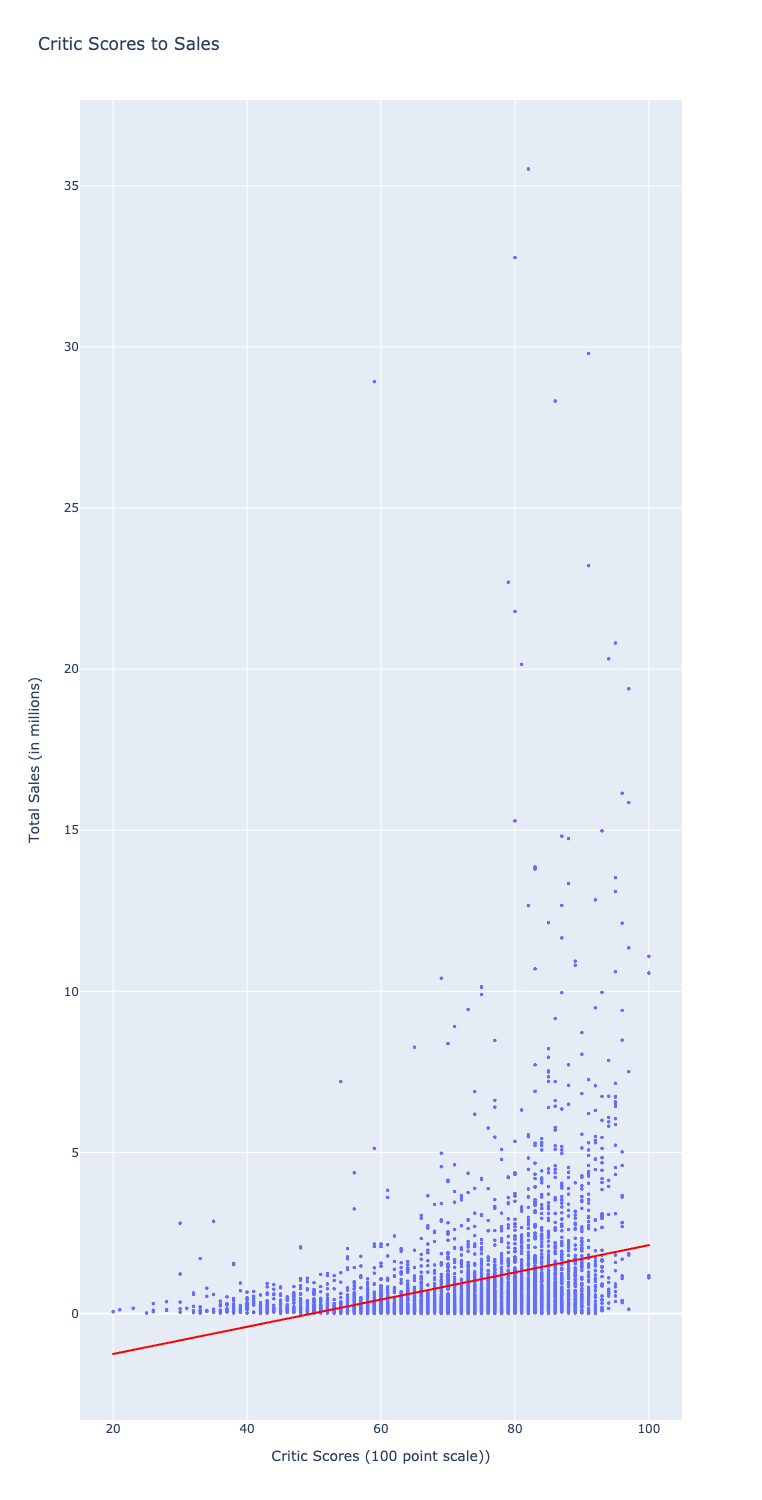

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     356.6
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.75e-76
Time:                        22:22:07   Log-Likelihood:                -8973.2
No. Observations:                4309   AIC:                         1.795e+04
Df Residuals:                    4307   BIC:                         1.796e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0959      0.165    -12.702      0.0

In [201]:
#vg_df_usual = vg_df[(vg_df['total_sales'] < 10)]
vg_df_usual = vg_df[(vg_df['total_sales'] > 1)]
fig = px.scatter(vg_df, x="critic_score", y="total_sales", 
                 trendline="ols", trendline_color_override="red", height = 1500,
                labels={
                    
                     "critic_score": "Critic Scores (100 point scale))",
                    "total_sales": "Total Sales (in millions)"
                 },
                title="Critic Scores to Sales")

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.1,
    xanchor="right",
    x=1
))

fig.show()

results = px.get_trendline_results(fig)
result = results.iloc[0]["px_fit_results"].summary()
print(result)



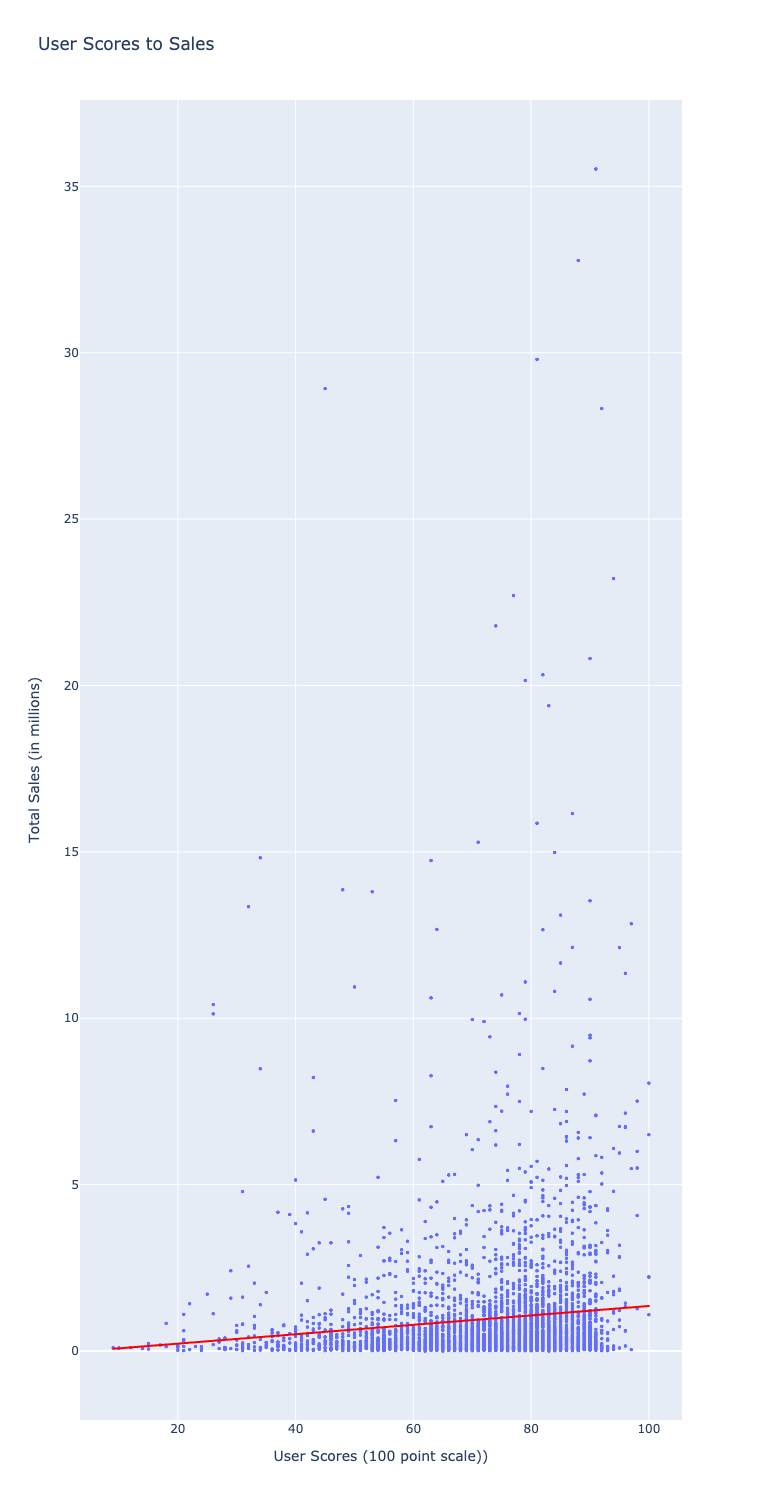

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     41.00
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.68e-10
Time:                        22:24:38   Log-Likelihood:                -9124.1
No. Observations:                4309   AIC:                         1.825e+04
Df Residuals:                    4307   BIC:                         1.827e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0616      0.164     -0.376      0.7

In [202]:
#vg_df_usual = vg_df[(vg_df['total_sales'] < 10)]
#vg_df_usual = vg_df[(vg_df['total_sales'] > 1)]
fig = px.scatter(vg_df, x="user_score", y="total_sales", 
                 trendline="ols", trendline_color_override="red", height = 1500,
                labels={
                    
                     "user_score": "User Scores (100 point scale))",
                    "total_sales": "Total Sales (in millions)"
                 },
                title="User Scores to Sales")

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.1,
    xanchor="right",
    x=1
))

fig.show()

results = px.get_trendline_results(fig)
result = results.iloc[0]["px_fit_results"].summary()
print(result)



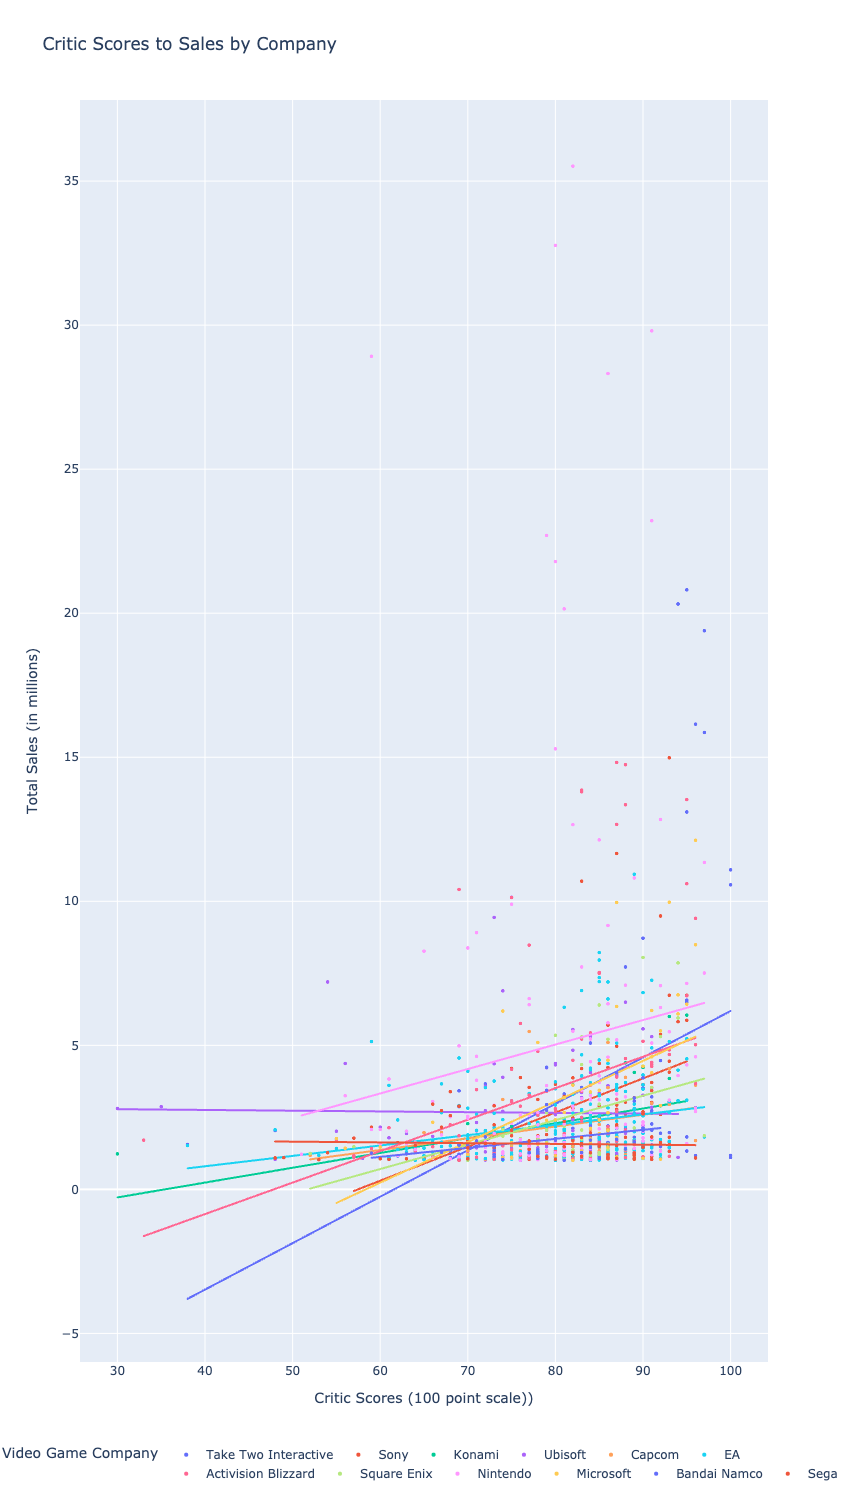

      Video Game Company                                     px_fit_results
0   Take Two Interactive  <statsmodels.regression.linear_model.Regressio...
1                   Sony  <statsmodels.regression.linear_model.Regressio...
2                 Konami  <statsmodels.regression.linear_model.Regressio...
3                Ubisoft  <statsmodels.regression.linear_model.Regressio...
4                 Capcom  <statsmodels.regression.linear_model.Regressio...
5                     EA  <statsmodels.regression.linear_model.Regressio...
6    Activision Blizzard  <statsmodels.regression.linear_model.Regressio...
7            Square Enix  <statsmodels.regression.linear_model.Regressio...
8               Nintendo  <statsmodels.regression.linear_model.Regressio...
9              Microsoft  <statsmodels.regression.linear_model.Regressio...
10          Bandai Namco  <statsmodels.regression.linear_model.Regressio...
11                  Sega  <statsmodels.regression.linear_model.Regressio...


In [122]:
#vg_df_usual = vg_df[(vg_df['total_sales'] < 10)]
vg_df_usual = vg_df[(vg_df['total_sales'] > 1)]
fig = px.scatter(vg_df_usual, x="critic_score", y="total_sales", 
                 color="company", trendline="ols", height = 1500,
                labels={
                     "company": "Video Game Company",
                     "critic_score": "Critic Scores (100 point scale))",
                    "total_sales": "Total Sales (in millions)"
                 },
                title="Critic Scores to Sales by Company")

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.1,
    xanchor="right",
    x=1
))

fig.show()

results = px.get_trendline_results(fig)
print(results)

#results.query("sex == 'Male' and smoker == 'Yes'").px_fit_results.iloc[0].summary()

In [85]:
group_date = vg_df.groupby(['release_date_x'])
rls_dt_ct = group_date.agg(['count'])['title'].reset_index()

rls_dt_ct

release_date_x  count
0        1999-01-17      1
1        1999-01-31      1
2        1999-04-30      1
3        1999-05-04      1
4        1999-05-31      1
...             ...    ...
1394     2016-11-01      1
1395     2016-11-04      4
1396     2016-11-08      3
1397     2016-11-15      4
1398     2016-11-22      1

[1399 rows x 2 columns]

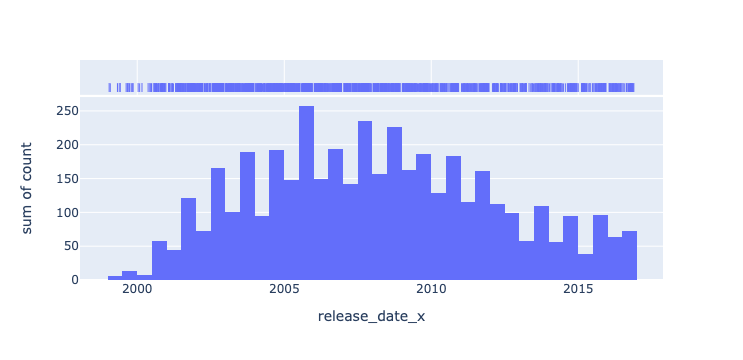

In [86]:
# x = np.random.randn(1000)
# hist_data = vg_df["release_date_x"]
# group_labels = ['distplot'] # name of the dataset

# fig = ff.create_distplot([rls_dt_ct["rls_dt_ct"]])
# fig.show()

# df = px.data.tips()
# fig = px.histogram(df, x="total_bill", y="tip", color="sex", marginal="rug",
#                    hover_data=df.columns)
# fig.show()

fig = px.histogram(rls_dt_ct, x="release_date_x", y='count', marginal="rug")
fig.show()

In [87]:
group_date_gen = vg_df.groupby(['release_date_x', 'genre_x'])
rls_dt_genre_ct = group_date_gen.agg(['count'])['title'].reset_index()

rls_dt_genre_ct

release_date_x           genre_x  count
0        1999-01-17            Racing      1
1        1999-01-31         Adventure      1
2        1999-04-30          Fighting      1
3        1999-05-04            Racing      1
4        1999-05-31          Platform      1
...             ...               ...    ...
2660     2016-11-08  Action-Adventure      1
2661     2016-11-08         Adventure      1
2662     2016-11-08      Role-Playing      1
2663     2016-11-15            Action      4
2664     2016-11-22      Role-Playing      1

[2665 rows x 3 columns]

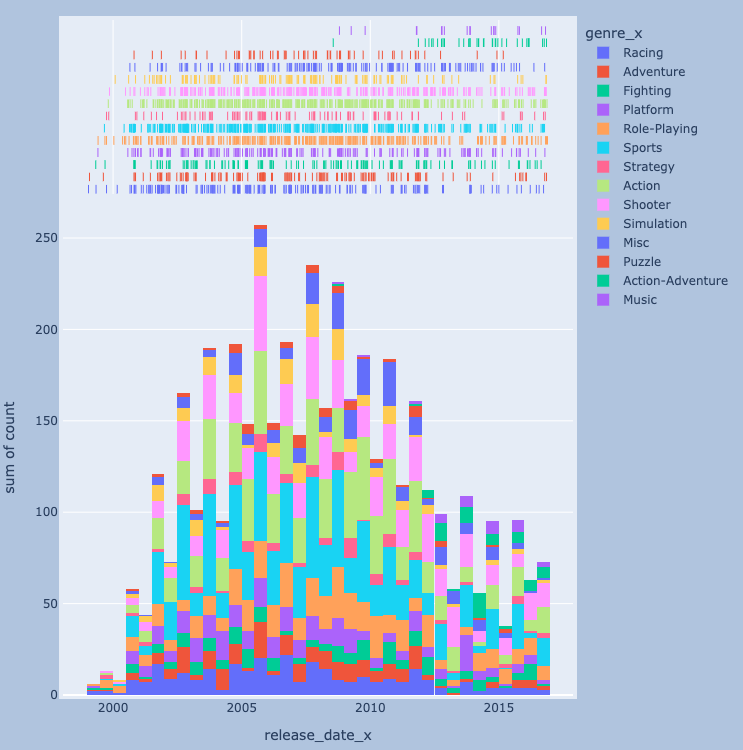

In [88]:
fig = px.histogram(rls_dt_genre_ct, x="release_date_x", y='count', color="genre_x", marginal="rug")
fig.update_layout(
    autosize=False,
    width=1000,
    height=750,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [129]:
group_date_comp = vg_df.groupby(['release_date_x', 'company'])
rls_dt_comp_ct = group_date_comp.agg(['count'])['title'].reset_index()

rls_dt_comp_ct

release_date_x       company  count
0        1999-01-17          Sony      1
1        1999-01-31        Konami      1
2        1999-04-30        Capcom      1
3        1999-05-04  Bandai Namco      1
4        1999-05-31          Sony      1
...             ...           ...    ...
2670     2016-11-08  Bandai Namco      1
2671     2016-11-08          Sony      1
2672     2016-11-08       Ubisoft      1
2673     2016-11-15       Ubisoft      4
2674     2016-11-22  Bandai Namco      1

[2675 rows x 3 columns]

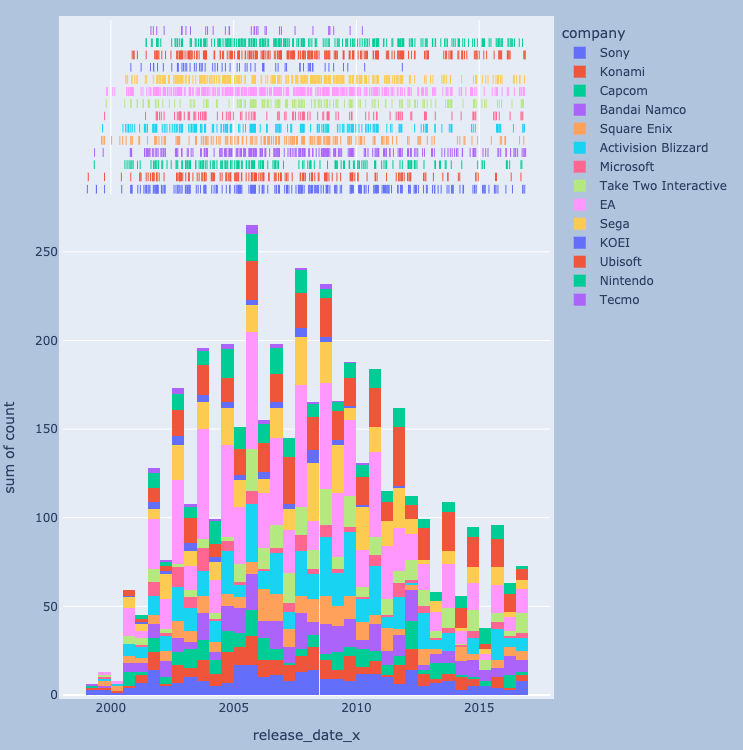

In [135]:
fig = px.histogram(rls_dt_comp_ct, x="release_date_x", y='count', color="company", marginal="rug")
fig.update_layout(
    autosize=False,
    width=1000,
    height=750,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [120]:
(vg_df['total_sales'].mean()) + (vg_df['total_sales'].std()*2)

5.6704488902444625

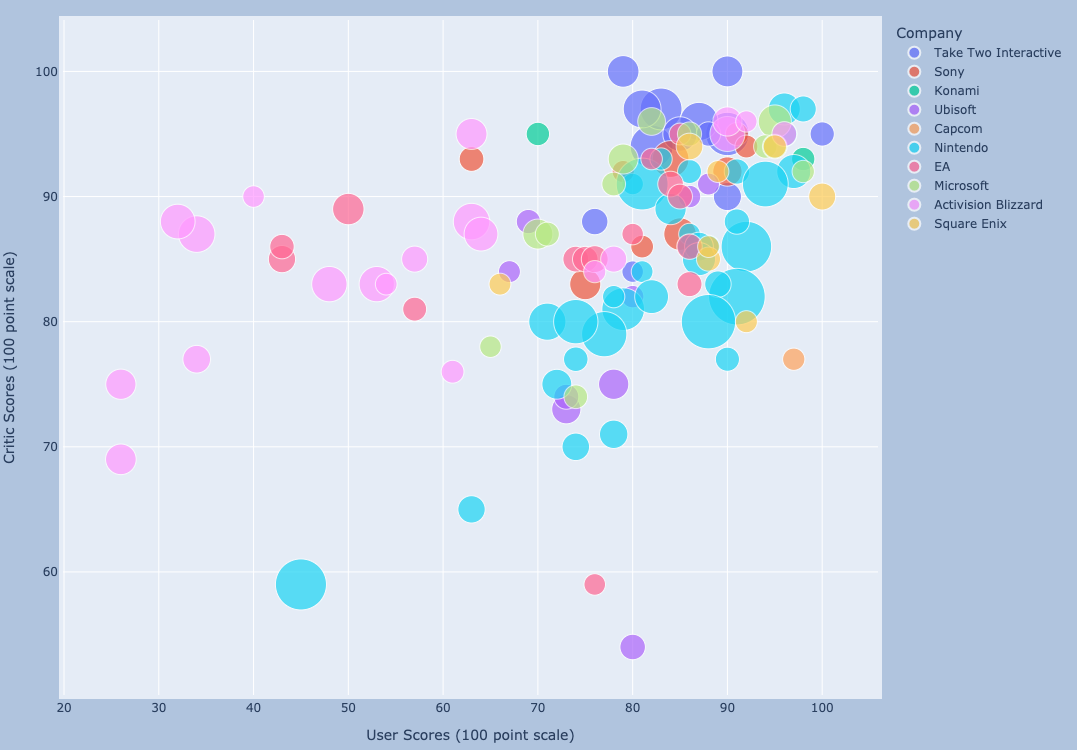

In [191]:
df = px.data.gapminder()

#Tried to do it with all the titles, but very hard to read.
#fig = px.scatter(vg_df, x="user_score", y="critic_score",
fig = px.scatter(vg_df.query("total_sales > 5"), x="user_score", y="critic_score",
         size="total_sales", color="company", labels={
                     "company": "Company",
                     "user_score": "User Scores (100 point scale)",
                    "critic_score": "Critic Scores (100 point scale)"
                 },
                 hover_name="title", log_x=False, 
                 #trendline="ols", 
                 size_max=40)
fig.update_layout(
    autosize=False,
    width=1000,
    height=750,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)


fig.show()

In [59]:
vg_df.loc[vg_df['total_sales'] > 80]

title console   genre_x  \
0                               Grand Theft Auto V     PS3    Action   
2                    Grand Theft Auto: San Andreas     PS2    Action   
1263                                      Wii Play     Wii      Misc   
1264  Brain Age: Train Your Brain in Minutes a Day      DS      Misc   
1544                         New Super Mario Bros.      DS  Platform   
1545                     New Super Mario Bros. Wii     Wii  Platform   
1912                                Mario Kart Wii     Wii    Racing   
1913                                 Mario Kart DS      DS    Racing   
3438                                    Wii Sports     Wii    Sports   
3439                             Wii Sports Resort     Wii    Sports   
3440                                       Wii Fit     Wii    Sports   
3441                                  Wii Fit Plus     Wii    Sports   

           publisher     developer_x  critic_score  total_sales  \
0     Rockstar Games  Rockstar North          94.0        20.32   
2     Rockstar Games  Rockstar North          95.0        20.81   
1263        Nintendo    Nintendo EAD          59.0        28.92   
1264        Nintendo    Nintendo SDD          81.0        20.15   
1544        Nintendo    Nintendo EAD          91.0        29.80   
1545        Nintendo    Nintendo EAD          86.0        28.32   
1912        Nintendo    Nintendo EAD          82.0        35.52   
1913        Nintendo    Nintendo EAD          91.0        23.21   
3438        Nintendo    Nintendo EAD          77.0        82.53   
3439        Nintendo    Nintendo EAD          80.0        32.77   
3440        Nintendo    Nintendo EAD          79.0        22.70   
3441        Nintendo    Nintendo EAD          80.0        21.79   

     release_date_x  NA_Sales  EU_Sales  ...  user_score  \
0        2013-09-17      7.02      9.09  ...        82.0   
2        2004-10-26      9.43      0.40  ...        90.0   
1263     2007-02-12     13.96      9.18  ...        45.0   
1264     2006-04-17      4.74      9.20  ...        79.0   
1544     2006-05-15     11.28      9.14  ...        81.0   
1545     2009-11-15     14.44      6.94  ...        92.0   
1912     2008-04-27     15.68     12.76  ...        91.0   
1913     2005-11-14      9.71      7.47  ...        94.0   
3438     2006-11-19     41.36     28.96  ...        80.0   
3439     2009-07-26     15.61     10.93  ...        88.0   
3440     2008-05-21      8.92      8.03  ...        77.0   
3441     2009-10-04      9.01      8.49  ...        74.0   

                              Title      Publisher  \
0                Grand Theft Auto V  RockstarNorth   
2     Grand Theft Auto: San Andreas  RockstarNorth   
1263                            NaN            NaN   
1264                            NaN            NaN   
1544          New Super Mario Bros.       Nintendo   
1545      New Super Mario Bros. Wii       Nintendo   
1912                 Mario Kart Wii       Nintendo   
1913                  Mario Kart DS       Nintendo   
3438                            NaN            NaN   
3439              Wii Sports Resort       Nintendo   
3440                        Wii Fit       Nintendo   
3441                   Wii Fit Plus       Nintendo   

                                                  Genre  Platform Metascore  \
0             Modern;Action Adventure;Modern;Open-World       PS3      97.0   
2                               Action Adventure;Modern       PS2      95.0   
1263                                                NaN       NaN       NaN   
1264                                                NaN       NaN       NaN   
1544                 Action;Platformer;Platformer;2D;2D        DS      89.0   
1545                 Action;Platformer;Platformer;2D;2D       Wii      87.0   
1912         Driving;Racing;Arcade;Kart;Kart;Automobile       Wii      82.0   
1913         Driving;Racing;Arcade;Kart;Kart;Automobile        DS      91.0   
3438                                     

In [61]:
vg_df[vg_df['title'].str.contains('Grand Theft Auto V')]

title console genre_x       publisher     developer_x  \
0   Grand Theft Auto V     PS3  Action  Rockstar Games  Rockstar North   
1   Grand Theft Auto V     PS4  Action  Rockstar Games  Rockstar North   
5   Grand Theft Auto V    X360  Action  Rockstar Games  Rockstar North   
7   Grand Theft Auto V      PC  Action  Rockstar Games  Rockstar North   
11  Grand Theft Auto V    XOne  Action  Rockstar Games  Rockstar North   

    critic_score  total_sales release_date_x  NA_Sales  EU_Sales  ...  \
0           94.0        20.32     2013-09-17      7.02      9.09  ...   
1           97.0        19.39     2014-11-18      3.96      6.31  ...   
5           97.0        15.86     2013-09-17      9.66      5.14  ...   
7           96.0         1.17     2015-04-14      0.39      0.69  ...   
11          90.0         8.72     2014-11-18      2.81      2.19  ...   

    user_score               Title      Publisher  \
0         82.0  Grand Theft Auto V  RockstarNorth   
1         83.0  Grand Theft Auto V  RockstarNorth   
5         81.0  Grand Theft Auto V  RockstarNorth   
7         79.0  Grand Theft Auto V  RockstarNorth   
11        90.0  Grand Theft Auto V  RockstarNorth   

                                        Genre  Platform Metascore  \
0   Modern;Action Adventure;Modern;Open-World       PS3      97.0   
1          Action Adventure;Modern;Open-World       PS4      97.0   
5   Modern;Action Adventure;Modern;Open-World      X360      97.0   
7          Modern;Action Adventure;Open-World        PC      96.0   
11         Action Adventure;Modern;Open-World      XOne      97.0   

    Avg_Userscore  No_Players               company  stock  
0            83.0   Up to 16   Take Two Interactive   TTWO  
1            83.0   Up to 30   Take Two Interactive   TTWO  
5            83.0   Up to 16   Take Two Interactive   TTWO  
7            77.0   Up to 32   Take Two Interactive   TTWO  
11           78.0   Up to 30   Take Two Interactive   TTWO  

[5 rows x 32 columns]

In [93]:
vg_df['company'].value_counts()

EA                      941
Activision Blizzard     465
Ubisoft                 464
Sega                    418
Bandai Namco            337
Sony                    292
Take Two Interactive    286
Nintendo                260
Square Enix             254
Konami                  245
Capcom                  217
Microsoft               130
Name: company, dtype: int64

In [185]:
vg_df_series = vg_df.copy()

aggregation_functions = {'company' : 'first', 'stock' : 'first', 'console': lambda x: ', '.join(x), 
                        'genre_x': 'first',  
                        'critic_score': 'mean', 'total_sales': 'sum',
                        'user_score': 'mean'}
vg_df_series = vg_df_series.groupby(['title', 'release_date_x']).aggregate(aggregation_functions)
vg_df_series.reset_index(inplace=True)
vg_df_series
pd.DataFrame(vg_df_series).to_csv(r'Data/VG_df_title_grouped.csv')

In [193]:
vg_comp_count = (vg_df_series['company'].value_counts()).to_frame()

vg_comp_count.reset_index(inplace=True)
vg_comp_count = vg_comp_count.rename(columns = {'index':'Company', 'company': 'count'})
vg_comp_count = vg_comp_count.sort_values(by=['count'], ascending=True)

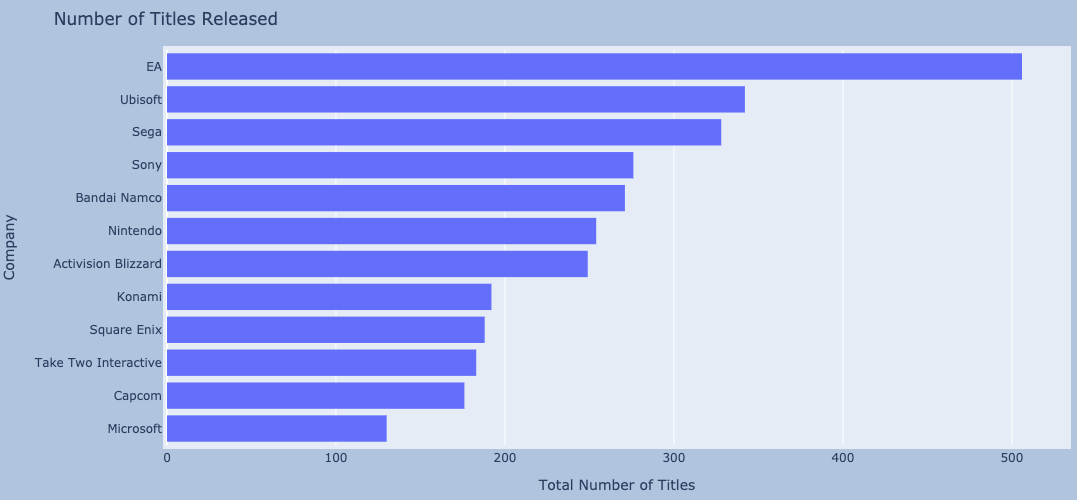

In [194]:
fig = px.histogram(vg_comp_count, y="Company", x='count')
fig.update_layout(
    title="Number of Titles Released",
    xaxis_title="Total Number of Titles",
    yaxis_title="Company",
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

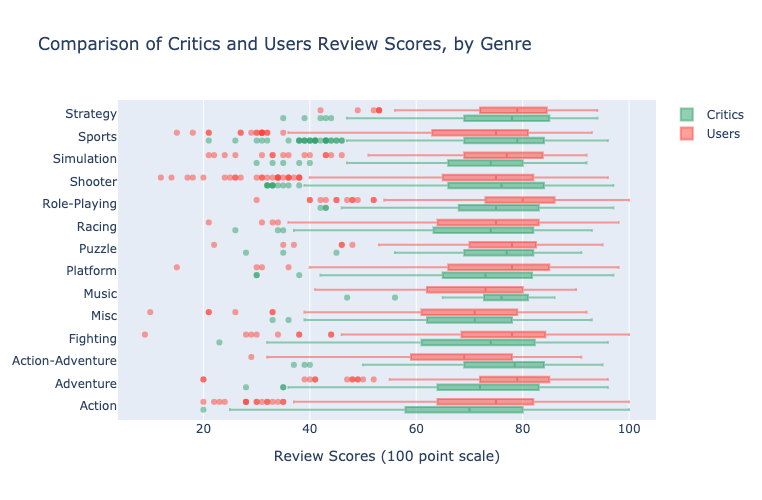

In [200]:
fig = go.Figure()
fig.add_trace(go.Box(
    x=vg_df['critic_score'],
    y=vg_df['genre_x'],
    name='Critics',
    marker_color='rgba(44, 160, 101, 0.5)'
))
fig.add_trace(go.Box(
    x=vg_df['user_score'],
    y=vg_df['genre_x'],
    name='Users',
    marker_color='rgba(255, 65, 54, 0.5)'
))

fig.update_layout(
    xaxis=dict(title='Review Scores (100 point scale)', zeroline=False),
    boxmode='group', height=500, title="Comparison of Critics and Users Review Scores, by Genre"
)


fig.update_traces(orientation='h') # horizontal box plots
fig.show()

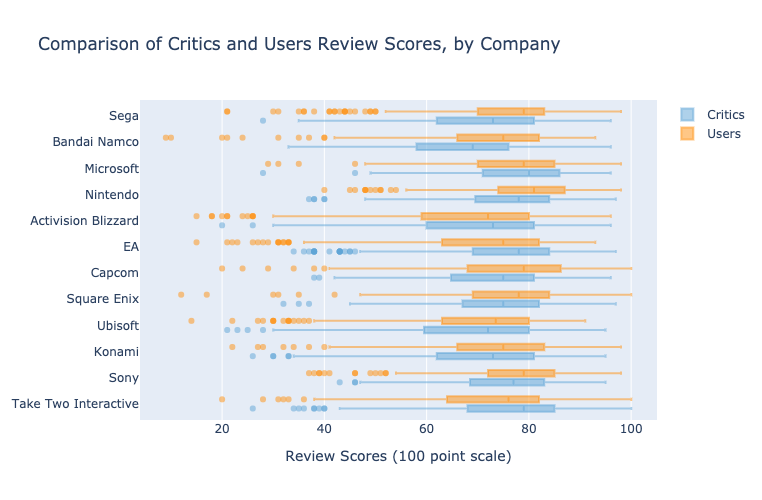

In [199]:
fig = go.Figure()
fig.add_trace(go.Box(
    x=vg_df['critic_score'],
    y=vg_df['company'],
    name='Critics',
    marker_color='rgba(93, 164, 214, 0.5)'
))
fig.add_trace(go.Box(
    x=vg_df['user_score'],
    y=vg_df['company'],
    name='Users',
    marker_color='rgba(255, 144, 14, 0.5)'
))

fig.update_layout(
    xaxis=dict(title='Review Scores (100 point scale)', zeroline=False),
    boxmode='group', height=500, title="Comparison of Critics and Users Review Scores, by Company"
)

fig.update_traces(orientation='h') # horizontal box plots
fig.show()